# Лабораторная работа №4: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2383 Шмонова Наталья Александровна и Сериков Магжан. Вариант №11.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

# Основные теоретические положения


Формула Эйлера:

$e^{ixt} = \cos(xt) + i \sin(xt)$

Квадратурные формулы для численного интегрирования:

Формула прямоугольников:
$y_{n+1} = y_n + s_{n+\frac{1}{2}}$

Формула трапеций:
$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$

Формула Симпсона:
$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$

Формула интегрирования «по правилу 3/8»:
$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$

В непрерывном времени идеальный интегратор соответствует делению на $i\omega$ в частотной области:

$$H_{\text{идеал}}(\omega) = \frac{1}{i\omega}$$

Для оценки частотной точности используется отношение вычисленного значения к точному значению, которое в частотной области выражается как:

$$\gamma(\omega) = \frac{H(\omega)}{H_{\text{идеал}}(\omega)} = H(\omega) \cdot i\omega$$



## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

Для выполнения лабораторной работы подключим необходимые библиотеки.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.


### **Вывод формулы прямоугольников**
Предполагаем, что шаг дискретизации $\Delta t = 1$.

Разностное уравнение, соответствующее формуле прямоугольников:

$$y_{n+1} = y_n + x_{n+\frac{1}{2}}$$

Входной сигнал $x_n$ — гармонический ряд:

$$x_n = e^{i\omega n}$$

Поскольку $x_t = e^{i\omega t}$, значение в середине интервала:

$$x_{n+\frac{1}{2}} = e^{i\omega(n+\frac{1}{2})} = e^{i\omega n}e^{i\omega/2}$$

Передаточная функция $H(\omega)$ определяется из предположения, что выходной сигнал $y_n$ также гармоничен с той же частотой:

$$y_n = H(\omega)e^{i\omega n}$$

Подставим выражения для $x_{n+\frac{1}{2}}$ и $y_n$ в разностное уравнение:

$$y_{n+1} = y_n + x_{n+\frac{1}{2}}$$

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + e^{i\omega n}e^{i\omega/2}$$

Разделим обе части на $e^{i\omega n}$:

$$H(\omega)e^{i\omega} = H(\omega) + e^{i\omega/2}$$

Сгруппируем члены с $H(\omega)$:

$$H(\omega)(e^{i\omega} - 1) = e^{i\omega/2}$$

Выразим частотную характеристику $H(\omega)$:

$$H(\omega) = \frac{e^{i\omega/2}}{e^{i\omega} - 1}$$

Используем формулу Эйлера: $e^{i\omega} - e^{-i\omega} = 2i \sin(\omega)$.

Вынесем $e^{i\omega/2}$ из знаменателя:

$$e^{i\omega} - 1 = e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})$$

Поскольку $e^{i\omega/2} - e^{-i\omega/2} = 2i \sin(\omega/2)$, то:

$$e^{i\omega} - 1 = e^{i\omega/2} \cdot 2i \sin(\omega/2)$$

Подставим это обратно в $H(\omega)$:

$$H(\omega) = \frac{e^{i\omega/2}}{e^{i\omega/2} \cdot 2i \sin(\omega/2)}$$

Сократим $e^{i\omega/2}$:

$$H(\omega) = \frac{1}{2i \sin(\omega/2)}$$

Точное значение интеграла от $x(t) = e^{i\omega t}$ за всё время $t$ равно:

$$Y_{\text{точное}}(t) = \int e^{i\omega t} dt = \frac{e^{i\omega t}}{i\omega}$$

Его частотная характеристика (отношение $Y/X$) в непрерывном времени:

$$H_{\text{идеал}}(\omega) = \frac{1}{i\omega}$$

Отношение вычисленной характеристики к идеальной:

$$\gamma(\omega) = \frac{H(\omega)}{H_{\text{идеал}}(\omega)}$$

Подставим $H(\omega)$ и $H_{\text{идеал}}(\omega)$:

$$\gamma(\omega) = \frac{\frac{1}{2i\sin(\omega/2)}}{\frac{1}{i\omega}} = \frac{1}{2i\sin(\omega/2)} \cdot i\omega = \frac{\omega}{2\sin(\omega/2)}$$

### **Вывод формулы трапеций**
Предполагаем, что шаг дискретизации $\Delta t = 1$.

Разностное уравнение, соответствующее формуле трапеций:

$$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1})$$

Входной гармонический сигнал:

$$x_n = e^{i\omega n}$$

Предполагаем, что выходной сигнал $y_n$ имеет вид:

$$y_n = H(\omega)e^{i\omega n}$$

Подставляем выражения для $x_n$ и $y_n$ в разностное уравнение:

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)})$$

Разделим обе части на $e^{i\omega n}$:

$$H(\omega)e^{i\omega} = H(\omega) + \frac{1}{2}(1 + e^{i\omega})$$

Сгруппируем члены с $H(\omega)$:

$$H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega})$$

Выразим частотную характеристику $H(\omega)$:

$$H(\omega) = \frac{e^{i\omega} + 1}{2(e^{i\omega} - 1)}$$

Преобразуем числитель и знаменатель, используя формулу Эйлера:

**Числитель:** Вынесем $e^{i\omega/2}$:

$$e^{i\omega} + 1 = e^{i\omega/2}(e^{i\omega/2} + e^{-i\omega/2})$$

Поскольку $e^{i\omega/2} + e^{-i\omega/2} = 2 \cos(\omega/2)$:

$$e^{i\omega} + 1 = 2e^{i\omega/2}\cos(\omega/2)$$

**Знаменатель:** Вынесем $e^{i\omega/2}$:

$$e^{i\omega} - 1 = e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})$$

Поскольку $e^{i\omega/2} - e^{-i\omega/2} = 2i \sin(\omega/2)$:

$$e^{i\omega} - 1 = 2ie^{i\omega/2}\sin(\omega/2)$$

Подставим преобразованные числитель и знаменатель обратно в $H(\omega)$:

$$H(\omega) = \frac{2e^{i\omega/2} \cos(\omega/2)}{2 \cdot (2ie^{i\omega/2} \sin(\omega/2))}$$

$$H(\omega) = \frac{\cos(\omega/2)}{2i \sin(\omega/2)}$$

Точная частотная характеристика идеального интегратора:

$$H_{идеал}(\omega) = \frac{1}{i\omega}$$

Отношение $\gamma(\omega)$ вычисленной характеристики к идеальной:

$$\gamma(\omega) = \frac{H(\omega)}{H_{идеал}(\omega)}$$

Подставим $H(\omega)$ и $H_{идеал}(\omega)$:

$$\gamma(\omega) = \frac{\frac{\cos(\omega/2)}{2i\sin(\omega/2)}}{\frac{1}{i\omega}} = \frac{\cos(\omega/2)}{2i\sin(\omega/2)} \cdot i\omega$$

$$\gamma(\omega) = \frac{\omega \cos(\omega/2)}{2 \sin(\omega/2)}$$

### **Вывод формулы Симпсона**
Предполагаем, что шаг дискретизации $\Delta t = 1$.

Разностное уравнение, соответствующее формуле Симпсона:

$$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

Входной гармонический сигнал:

$$x_n = e^{i\omega n}$$

Предполагаем, что выходной сигнал $y_n$ имеет вид:

$$y_n = H(\omega)e^{i\omega n}$$

Подставляем выражения для $x_n$ и $y_n$ в разностное уравнение:

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{3}(e^{i\omega(n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)})$$

Разделим обе части на $e^{i\omega n}$:

$$H(\omega)e^{i\omega} = H(\omega)e^{-i\omega} + \frac{1}{3}(e^{-i\omega} + 4 + e^{i\omega})$$

Сгруппируем члены с $H(\omega)$:

$$H(\omega)(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}(e^{i\omega} + e^{-i\omega} + 4)$$

Используем формулы Эйлера:

- $e^{i\omega} - e^{-i\omega} = 2i \sin(\omega)$
- $e^{i\omega} + e^{-i\omega} = 2 \cos(\omega)$

Подставляем:

$$H(\omega)(2i \sin(\omega)) = \frac{1}{3}(2 \cos(\omega) + 4)$$

Выразим частотную характеристику $H(\omega)$:

$$H(\omega) = \frac{2 \cos(\omega) + 4}{3 \cdot 2i \sin(\omega)}$$

$$H(\omega) = \frac{2(\cos(\omega) + 2)}{6i \sin(\omega)}$$

$$H(\omega) = \frac{2 + \cos(\omega)}{3i \sin(\omega)}$$

Точная частотная характеристика идеального интегратора:

$$H_{\text{идеал}}(\omega) = \frac{1}{i\omega}$$

Отношение $\gamma(\omega)$ вычисленной характеристики к идеальной:

$$\gamma(\omega) = \frac{H(\omega)}{H_{\text{идеал}}(\omega)}$$

Подставим $H(\omega)$ и $H_{\text{идеал}}(\omega)$:

$$\gamma(\omega) = \frac{\frac{2 + \cos(\omega)}{3i \sin(\omega)}}{\frac{1}{i\omega}} = \frac{2 + \cos(\omega)}{3i \sin(\omega)} \cdot i\omega$$

$$\gamma(\omega) = \frac{\omega(2 + \cos(\omega))}{3 \sin(\omega)}$$

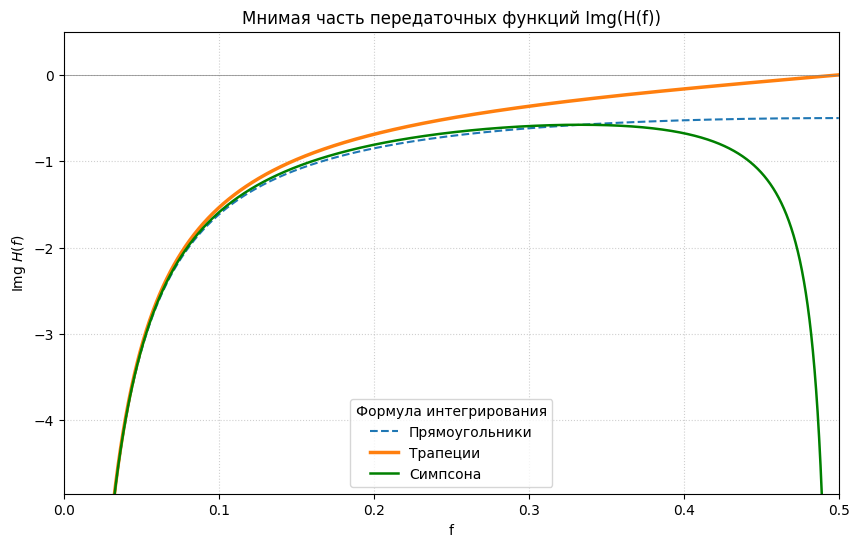

In [30]:
# Физическая частота f
freq_f = np.linspace(0.005, 0.5, 5000)
# Угловая частота омега (omega = 2 * pi * f)
omega = 2 * np.pi * freq_f

# Вычисление частотных характеристик H(omega)

# H_rect: Прямоугольники H(w) = 1 / (2i * sin(w/2))
H_rect = 1 / (2j * np.sin(omega / 2))
# H_trap: Трапеции H(w) = cos(w/2) / (2i * sin(w/2))
H_trap = np.cos(omega / 2) / (2j * np.sin(omega / 2))
# H_simp: Симпсона H(w) = (2 + cos(w)) / (3i * sin(w))
H_simp = (2 + np.cos(omega)) / (3j * np.sin(omega))

# Для фильтра-интегратора Re(H) = 0, и Img(H) ~ |H|
img_h_rect = np.imag(H_rect)
img_h_trap = np.imag(H_trap)
img_h_simp = np.imag(H_simp)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(freq_f, img_h_rect, label='Прямоугольники', linewidth=1.5, linestyle='--')
plt.plot(freq_f, img_h_trap, label='Трапеции', linewidth=2.5)
plt.plot(freq_f, img_h_simp, label='Симпсона', linewidth=1.8, color='green')

plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)

plt.title('Мнимая часть передаточных функций Img(H(f))')
plt.xlabel('f')
plt.ylabel('Img $H(f)$')
plt.xlim(0, 0.5)
plt.ylim(-4.85, 0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Формула интегрирования')
plt.show()

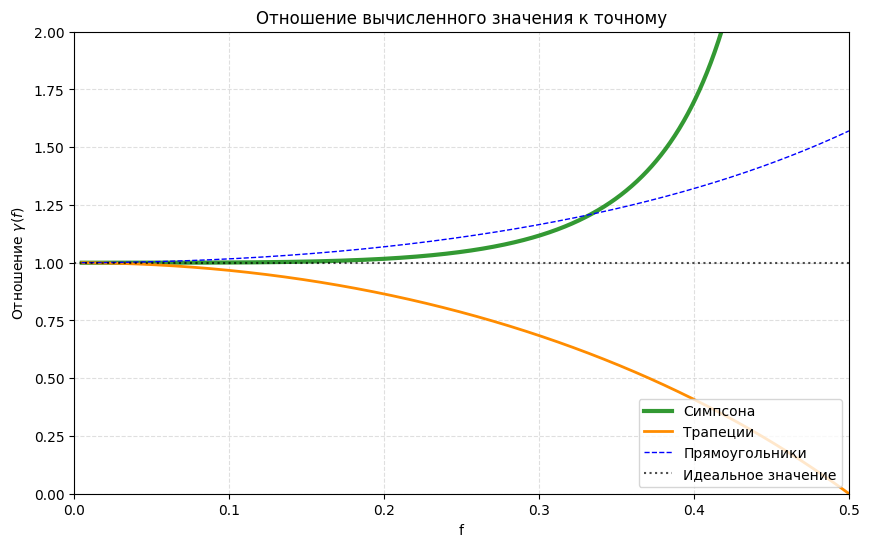

In [31]:
# Частоты
freq_f = np.linspace(0.005, 0.5, 1000)
omega = 2 * np.pi * freq_f

# Вычисление отношения точности gamma(f)

# gamma_rect: Прямоугольники
gamma_rect = (omega / 2) / np.sin(omega / 2)
# gamma_trap: Трапеции
gamma_trap = np.cos(omega / 2) * (omega / 2) / np.sin(omega / 2)
# gamma_simp: Симпсона
gamma_simp = (2 + np.cos(omega)) / 3 * omega / np.sin(omega)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(freq_f, gamma_simp, label='Симпсона', linewidth=3, color='green', alpha=0.8)
plt.plot(freq_f, gamma_trap, label='Трапеции', linewidth=2, color='darkorange')
plt.plot(freq_f, gamma_rect, label='Прямоугольники', linewidth=1, linestyle='--', color='blue')

plt.axhline(y=1, color='k', linestyle=':', alpha=0.7, label='Идеальное значение')

plt.title('Отношение вычисленного значения к точному')
plt.xlabel('f')
plt.ylabel(r'Отношение $\gamma(f)$')

plt.xlim(0, 0.5)
plt.ylim(0, 2)

plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='lower right')
plt.show()

Передаточные функции рекурсивных фильтров, полученные из квадратурных формул, по своей природе являются **фильтрами нижних частот**, что подтверждается резким ростом модуля $|H(f)|$ (или $\text{Img}(H(f))$) на низких частотах, стремящимся к бесконечности при $f \to 0$.

Анализ отношения точности $\gamma(f)$ показывает, что **все три формулы абсолютно точны для низких частот** ($\gamma(f) \to 1$ при $f \to 0$), поскольку в этом диапазоне дискретные приращения хорошо аппроксимируют непрерывный интеграл.

При повышении частоты $f$ точность снижается, причём:

- **Формула трапеций** демонстрирует тенденцию к **недооценке** истинного значения ($\gamma(f) < 1$)
- **Формула прямоугольников** склонна к **переоценке** ($\gamma(f) > 1$)

Наилучшую частотную точность обеспечивает **формула Симпсона**, которая удерживает $\gamma(f)$ максимально близко к единице в самом широком диапазоне (примерно до $f = 0.25$), что является следствием её более высокого (четвертого) порядка аппроксимации, что делает её предпочтительным выбором для интегрирования сигналов с широким спектром.

На высоких частотах все методы теряют точность, и Симпсон также демонстрирует резкое расхождение, но в целом он наилучшим образом сохраняет амплитудную составляющую интегрируемого сигнала.

## Задание 2
Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
$ y_{n + 2} = y_{n - 1} + \frac{1}{8} (x_{n + 2} + 3x_{n + 1} + 3x_n + x_{n - 1}) $

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

Исходное разностное уравнение:
$$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

Входной сигнал $x_n$ — гармонический ряд:
$$x_n = e^{i\omega n}$$

Предполагаем, что выходной сигнал $y_n$ также гармоничен с той же частотой:
$$y_n = H(\omega)e^{i\omega n}$$

Подставим выражения для $x_n$ и $y_n$ в разностное уравнение:
$$H(\omega)e^{i\omega(n+2)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n+2)} + 3e^{i\omega(n+1)} + 3e^{i\omega n} + e^{i\omega(n-1)})$$

Вынесем общий множитель $e^{i\omega n}$:
$$H(\omega)e^{i\omega n}e^{2i\omega} = H(\omega)e^{i\omega n}e^{-i\omega} + \frac{1}{8}e^{i\omega n}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

Разделим обе части на $e^{i\omega n}$:
$$H(\omega)e^{2i\omega} = H(\omega)e^{-i\omega} + \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

Сгруппируем члены с $H(\omega)$:
$$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

Выразим частотную характеристику $H(\omega)$:
$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})}$$

Умножим числитель и знаменатель на $e^{-0.5i\omega}$:
$$H(\omega) = \frac{e^{1.5i\omega} + 3e^{0.5i\omega} + 3e^{-0.5i\omega} + e^{-1.5i\omega}}{8(e^{1.5i\omega} - e^{-1.5i\omega})}$$

Используем формулы Эйлера: $e^{i\theta} + e^{-i\theta} = 2\cos(\theta)$ и $e^{i\theta} - e^{-i\theta} = 2i\sin(\theta)$:

$$H(\omega) = \frac{2\cos(1.5\omega) + 6\cos(0.5\omega)}{8 \cdot 2i\sin(1.5\omega)} = \frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)}$$

Точное значение интеграла от $x(t) = e^{i\omega t}$ равно:
$$Y_{\text{точное}}(t) = \int e^{i\omega t} dt = \frac{e^{i\omega t}}{i\omega}$$

Его частотная характеристика (отношение $Y/X$) в непрерывном времени:
$$H_{\text{идеал}}(\omega) = \frac{1}{i\omega}$$

Отношение вычисленной характеристики к идеальной:
$$\gamma(\omega) = \frac{H(\omega)}{H_{\text{идеал}}(\omega)}$$

Подставим $H(\omega)$ и $H_{\text{идеал}}(\omega)$:
$$\gamma(\omega) = \frac{\frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)}}{\frac{1}{i\omega}} = \frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)} \cdot i\omega$$

Упростим выражение:
$$\gamma(\omega) = \frac{[\cos(1.5\omega) + 3\cos(0.5\omega)] \cdot \omega}{8\sin(1.5\omega)}$$

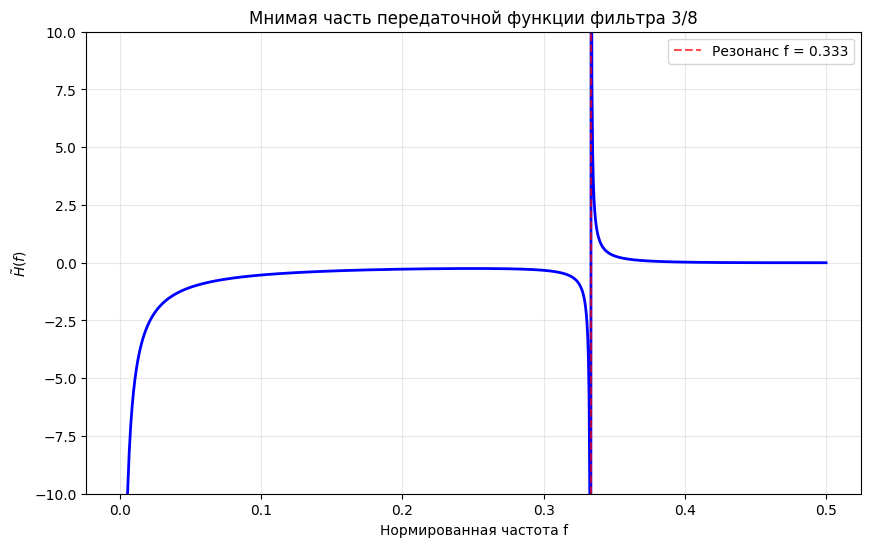

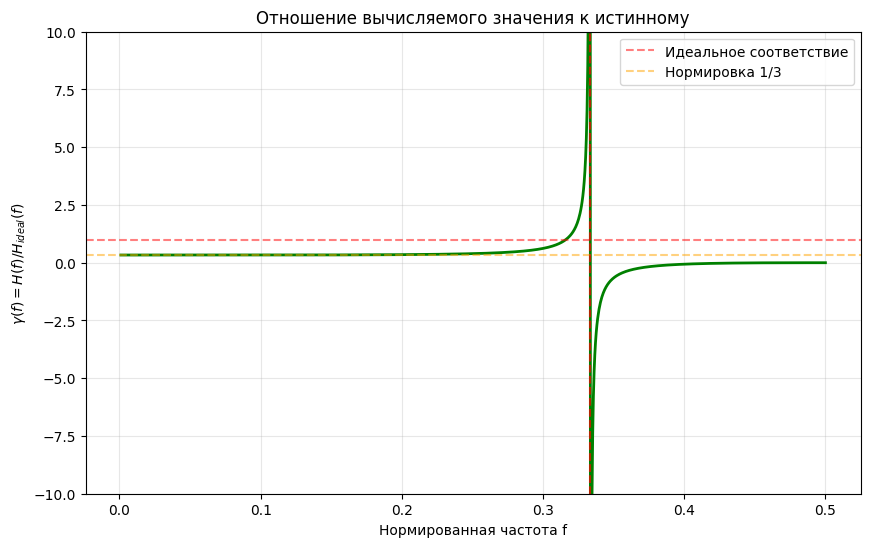

In [32]:
F = np.linspace(0.001, 0.5, 1000)
W = 2 * np.pi * F

H_3_8 = [(np.cos(1.5 * w) + 3 * np.cos(0.5 * w)) / (8 * 1j * np.sin(1.5 * w)) for w in W]

plt.figure(figsize=(10, 6))
plt.plot(F, [h.imag for h in H_3_8], 'b-', linewidth=2)
plt.xlabel('Нормированная частота f')
plt.ylabel('$\\tilde H(f)$')
plt.title('Мнимая часть передаточной функции фильтра 3/8')
plt.grid(True, alpha=0.3)
plt.ylim((-10, 10))

resonance_f1 = 1/3  # f = 1/3 (где sin(1.5w) = 0)
plt.axvline(x=resonance_f1, color='red', linestyle='--', alpha=0.7,
           label=f'Резонанс f = {resonance_f1:.3f}')
plt.legend()
plt.show()

Y_3_8 = [((np.cos(1.5 * w) + 3 * np.cos(0.5 * w)) * w) / (8 * np.sin(1.5 * w)) for w in W]

plt.figure(figsize=(10, 6))
plt.plot(F, Y_3_8, 'g-', linewidth=2)
plt.xlabel('Нормированная частота f')
plt.ylabel('$\\gamma(f) = H(f)/H_{ideal}(f)$')
plt.title('Отношение вычисляемого значения к истинному')
plt.grid(True, alpha=0.3)
plt.ylim((-10, 10))

plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Идеальное соответствие')
plt.axhline(y=1/3, color='orange', linestyle='--', alpha=0.5, label='Нормировка 1/3')

plt.axvline(x=resonance_f1, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Передаточная функция $\tilde{H}(f)$ показывает, что фильтр является **интегратором нижних частот**, поскольку его усиление **бесконечно растет** при приближении частоты $f$ к нулю, а фазовый сдвиг соответствует идеальному интегратору. Однако фильтр **нестабилен**, о чём свидетельствует резкий **резонанс** (вертикальная асимптота) при нормированной частоте $f \approx 0.333$, где он бесконечно усиливает сигналы. График отношения $\gamma(f)$ показывает, что **точность интегрирования высока ($\gamma(f) \approx 1$) только на очень низких частотах ($f < 0.1$)**, после чего точность быстро падает, и фильтр становится неприменим вблизи точки резонанса.

## Задание 3
Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.


Все методы численного интегрирования (прямоугольников, трапеций, Симпсона и правило 3/8) успешно имитируют идеальный интегратор в низкочастотной области ($\omega \rightarrow 0$), демонстрируя неограниченное усиление и минимальную погрешность. В высокочастотной области их свойства расходятся: методы Трапеций и Симпсона обеспечивают полное подавление сигнала на частоте Найквиста ($\omega = \pi$), что способствует фильтрации высокочастотного шума. Метод Симпсона при этом часто показывает **наивысшую общую точность** в рабочем диапазоне частот. В отличие от них, метод 3/8 страдает от критического недостатка: наличия резонанса при $f \approx 0.333$, что приводит к **нестабильности** и делает фильтр неприменимым для сигналов с этой частотной компонентой. Метод прямоугольников демонстрирует лишь **умеренное подавление** на высоких частотах. Таким образом, методы Симпсона и Трапеций являются более **устойчивыми и предсказуемыми** по сравнению с правилом 3/8.

## Выводы

В ходе лабораторной работы проведён анализ частотных характеристик рекурсивных цифровых интеграторов, реализованных на основе формул численного интегрирования, включая методы прямоугольников, трапеций, Симпсона и правила 3/8. Анализ показал, что все реализации ведут себя как фильтры нижних частот, подтверждая, что они корректно интегрируют сигналы с бесконечным усилением на нулевой частоте. Построение графиков отношения $\gamma(\omega)$ выявило, что точность интегрирования обратно пропорциональна частоте сигнала. При этом методы низкого порядка (прямоугольники и трапеции) демонстрируют значительную ошибку на высоких частотах. Формула Симпсона и правило 3/8 обеспечивают наивысшую частотную точность в широком рабочем диапазоне, что подтверждает преимущество использования квадратурных формул высокого порядка.